In [1]:
# start with imports - this will be mostly EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from ipython.display import display
#pd.options.display.max_columns = None

In [2]:
# import work stoppages annual listing
col_names = ["Year", "StopsBegin", "StopsEffect", "WorkerBegin", "WorkerEffect", "DaysIdle", "DaysIdlePct"]
stoppages = pd.read_csv("annual-listing.csv", header=0, names=col_names)

In [115]:
stoppages.tail()

,Year,StopsBegin,StopsEffect,WorkerBegin,WorkerEffect,DaysIdle,DaysIdlePct
71,2018,20,21,485.2,487.0,2815.4,0.01
72,2019,25,27,425.5,428.5,3244.3,0.01
73,2020,8,10,27.0,30.6,965.7,0.0025
74,2021,16,17,80.7,82.5,1551.9,0.0025
75,2022,23,26,120.6,126.5,2312.7,0.01


From the original file we have the following notes:

[2] Days idle includes all stoppages in effect during the reference period. For work stoppages that are still ongoing at the end of the calendar year, only those days of idleness in the calendar year are counted. 

[3] Percent of estimated working time is calculated using employment estimates from the Current Employment Statistics program and the number of workdays in the month and number of days idle from the Work Stoppages program.

[4] Data not available.

[5] Less than .005.


On the basis of this, obviously, "[4]"s should be replaced with NaN's.  But what about "[5]"?  One very naive option is to simply pick the midpoint of 0.005 and 0, and I think I'll go with that here.

In [4]:
# maybe it will be this easy

stoppages.replace(to_replace="[4]", value=np.nan, inplace=True)
stoppages.replace(to_replace="[5]", value=0.0025, inplace=True)

In [5]:
display(stoppages)

,Year,StopsBegin,StopsEffect,WorkerBegin,WorkerEffect,DaysIdle,DaysIdlePct
0,1947,270,NaN,"1,629.0",NaN,"25,720.0",NaN
1,1948,245,NaN,"1,435.0",NaN,"26,127.0",0.22
2,1949,262,NaN,"2,537.0",NaN,"43,420.0",0.38
3,1950,424,NaN,"1,698.0",NaN,"30,390.0",0.26
4,1951,415,NaN,"1,462.0",NaN,"15,070.0",0.12
...,...,...,...,...,...,...,...
71,2018,20,21,485.2,487.0,2815.4,0.01
72,2019,25,27,425.5,428.5,3244.3,0.01
73,2020,8,10,27.0,30.6,965.7,0.0025
74,2021,16,17,80.7,82.5,1551.9,0.0025


It looks like it was, in fact, that easy.  Before anything else - let's make some very basic graphs.

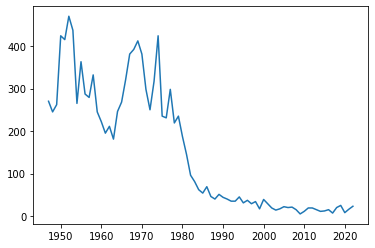

In [6]:
plt.plot(stoppages["Year"], stoppages["StopsBegin"])

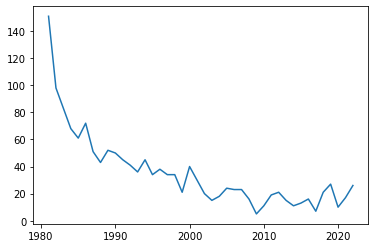

In [7]:
plt.plot(stoppages["Year"], stoppages["StopsEffect"])

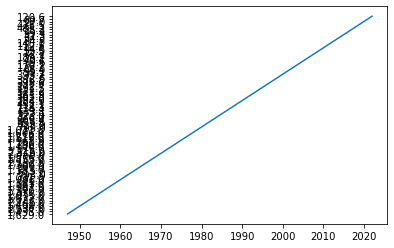

In [8]:
plt.plot(stoppages["Year"], stoppages["WorkerBegin"])

This makes absolutely no sense to me, and a cursory search wasn't informative.  The cases I found of this involved the variable being of string type; is that possibly happening here?

In [9]:
type(stoppages["WorkerBegin"][0])

str

Well, I guess that search WAS informative.

In [10]:
stoppages["WorkerBegin"] = pd.Series(map(float, stoppages["WorkerBegin"]))

ValueError: could not convert string to float: '1,629.0'

What a vexing little problem!  The comma precludes float representation.  Ugh.

In [ ]:
stoppages["WorkerBegin"] = stoppages["WorkerBegin"].str.replace(",", "")

In [11]:
stoppages.head()

,Year,StopsBegin,StopsEffect,WorkerBegin,WorkerEffect,DaysIdle,DaysIdlePct
0,1947,270,NaN,"1,629.0",NaN,"25,720.0",NaN
1,1948,245,NaN,"1,435.0",NaN,"26,127.0",0.22
2,1949,262,NaN,"2,537.0",NaN,"43,420.0",0.38
3,1950,424,NaN,"1,698.0",NaN,"30,390.0",0.26
4,1951,415,NaN,"1,462.0",NaN,"15,070.0",0.12


This appears to have worked.  I can see that I need to do the same with DaysIdle.

In [12]:
stoppages["DaysIdle"] = stoppages["DaysIdle"].str.replace(",", "")
stoppages.head()

,Year,StopsBegin,StopsEffect,WorkerBegin,WorkerEffect,DaysIdle,DaysIdlePct
0,1947,270,NaN,"1,629.0",NaN,25720.0,NaN
1,1948,245,NaN,"1,435.0",NaN,26127.0,0.22
2,1949,262,NaN,"2,537.0",NaN,43420.0,0.38
3,1950,424,NaN,"1,698.0",NaN,30390.0,0.26
4,1951,415,NaN,"1,462.0",NaN,15070.0,0.12


In [13]:
# Now, both of these variables should be mappable to floats, right?

stoppages["WorkerBegin"] = pd.Series(map(float, stoppages["WorkerBegin"]))
stoppages["DaysIdle"] = pd.Series(map(float, stoppages["DaysIdle"]))

ValueError: could not convert string to float: '1,629.0'

In [14]:
type(stoppages["WorkerBegin"][0])

str

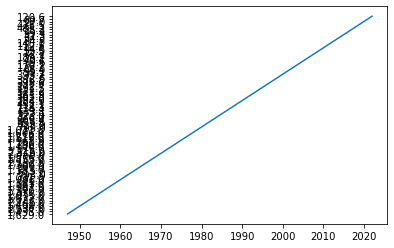

In [15]:
# this should now - after all that! - finally produce the simple line graph I wanted:

plt.plot(stoppages["Year"], stoppages["WorkerBegin"])

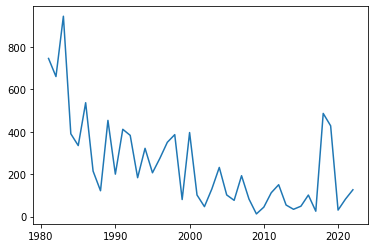

In [16]:
plt.plot(stoppages["Year"], stoppages["WorkerEffect"])

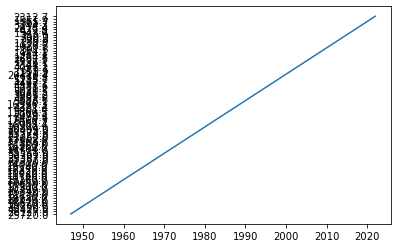

In [17]:
plt.plot(stoppages["Year"], stoppages["DaysIdle"])

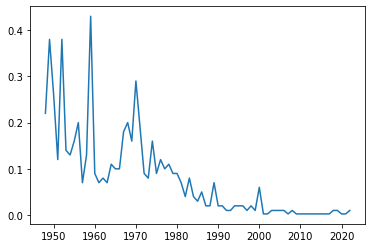

In [18]:
plt.plot(stoppages["Year"], stoppages["DaysIdlePct"])

Okay, so what's the story here?  In the first place, I have to note:  these series _don't_ have the same range.   It's obvious to see the (rough) correspondences between "StopsBegin" and "StopsEffect" and between "WorkerBegin" and "WorkerEffect" from the 1980's on.  Comparing "DaysIdle" and "DaysIdlePct" shows a similar correspondence, although if you look closely you'll discern the growing size of the labor force, as equal levels of "DaysIdle" correspond to slightly lower percentages.  

The most obvious phenomenon of all, however, is the overall downward trend in work stoppages.  By itself, this isn't much of a "data story" - I need to explore more deeply.  I'd like to incorporate some data sets involving union participation, workforce composition, and wage growth.  I'd also like to compare union activity across segments of the economy.  Unfortunately, I'm finding that the BLS data sources are simply _dismal_ - one important query is returning a _text file_ consisting of each series with the index _as a distinct csv, with a header_ - and I'm trying to work through that, although, as I understand, this isn't meant to be a data wrangling activity.

To my delight, I discovered that pandas read_csv has a "thousands" attribute!  This makes the import task far more tractable, although I am still going to need to clean up the atrocious non-csv file that the data tool returns.

# Union representation data set:  cleaning


In [19]:
union = pd.read_csv("union_repr.csv")

In [20]:
union.head()


,Series ID,Annual 1983,Annual 1984,Annual 1985,Annual 1986,Annual 1987,Annual 1988,Annual 1989,Annual 1990,Annual 1991,...,Annual 2013,Annual 2014,Annual 2015,Annual 2016,Annual 2017,Annual 2018,Annual 2019,Annual 2020,Annual 2021,Annual 2022
0,LUU0204466800,88290,92194,94521,96903,99303,101407,103480,104876,103723,...,129110.0,131431.0,133743.0,136101.0,137890.0,140099.0,141737.0,132174.0,136393.0,141673.0
1,LUU0203161800,17717,17340,16996,16975,16913,17002,16960,16776,16612,...,14528.0,14576.0,14795.0,14555.0,14817.0,14744.0,14574.0,14253.0,14012.0,14285.0
2,LUU0204899600,20.1,18.8,18.0,17.5,17.0,16.8,16.4,16.0,16.0,...,11.3,11.1,11.1,10.7,10.7,10.5,10.3,10.8,10.3,10.1
3,LUU0203161900,20532,19932,19358,19278,19051,19241,19198,19105,18790,...,16028.0,16152.0,16441.0,16271.0,16444.0,16380.0,16383.0,15939.0,15802.0,16002.0
4,LUU0204899700,23.3,21.6,20.5,19.9,19.2,19.0,18.6,18.2,18.1,...,12.4,12.3,12.3,12.0,11.9,11.7,11.6,12.1,11.6,11.3


There are so many things wrong here that I don't know where to begin!  Maybe making each year a row, and stripping the "Annual " from them.

In [21]:
union = union.transpose()

In [22]:
union.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Series ID,LUU0204466800,LUU0203161800,LUU0204899600,LUU0203161900,LUU0204899700,LUU0204466700,LUU0203182000,LUU0204906600,LUU0203182100,LUU0204906700,LUU0202851800,LUU0204922600,LUU0204922700,LUU0204922800,LUU0204922900
Annual 1983,88290,17717,20.1,20532,23.3,71225(5),11933(5),16.8(5),,,15618(5),5735(5),36.7(5),,
Annual 1984,92194,17340,18.8,19932,21.6,74931(5),11647(5),15.5(5),,,15809(5),5654(5),35.8(5),,
Annual 1985,94521,16996,18.0,19358,20.5,77044(5),11227(5),14.6(5),,,16050(5),5740(5),35.8(5),,
Annual 1986,96903,16975,17.5,19278,19.9,79091(5),11051(5),14.0(5),,,16374(5),5888(5),36.0(5),,


In [23]:
union.index = union.index.str.replace('Annual ','')


In [24]:
union.index

Index(['Series ID', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [25]:
union.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Series ID,LUU0204466800,LUU0203161800,LUU0204899600,LUU0203161900,LUU0204899700,LUU0204466700,LUU0203182000,LUU0204906600,LUU0203182100,LUU0204906700,LUU0202851800,LUU0204922600,LUU0204922700,LUU0204922800,LUU0204922900
1983,88290,17717,20.1,20532,23.3,71225(5),11933(5),16.8(5),,,15618(5),5735(5),36.7(5),,
1984,92194,17340,18.8,19932,21.6,74931(5),11647(5),15.5(5),,,15809(5),5654(5),35.8(5),,
1985,94521,16996,18.0,19358,20.5,77044(5),11227(5),14.6(5),,,16050(5),5740(5),35.8(5),,
1986,96903,16975,17.5,19278,19.9,79091(5),11051(5),14.0(5),,,16374(5),5888(5),36.0(5),,


Ok, this is still pretty awful.  Variables are using some legacy "Series ID" that needs translation, and then to be placed into column labels, and then I can delete that first row.  Also, there are some footnotes present that need to be scrubbed, which means that data types probably need correction too.  Again:  this wasn't _supposed_ to be a data wrangling exercise...

In [26]:
new_columns = ["EmpWorkers", "EmpUnion", "UnionPct", "UnionRepr", "ReprPct", "EmpPrivate", "UnionPrivate", 
               "UnionPrivatePct", "PrivateRepr", "PrivateReprPct", "EmpPublic", "UnionPublic", "UnionPublicPct", 
              "PublicRepr", "PublicReprPct"]


In [27]:
union.columns = new_columns

In [28]:
union.drop(union.index[0], inplace=True)

In [29]:
union

,EmpWorkers,EmpUnion,UnionPct,UnionRepr,ReprPct,EmpPrivate,UnionPrivate,UnionPrivatePct,PrivateRepr,PrivateReprPct,EmpPublic,UnionPublic,UnionPublicPct,PublicRepr,PublicReprPct
1983,88290,17717,20.1,20532,23.3,71225(5),11933(5),16.8(5),,,15618(5),5735(5),36.7(5),,
1984,92194,17340,18.8,19932,21.6,74931(5),11647(5),15.5(5),,,15809(5),5654(5),35.8(5),,
1985,94521,16996,18.0,19358,20.5,77044(5),11227(5),14.6(5),,,16050(5),5740(5),35.8(5),,
1986,96903,16975,17.5,19278,19.9,79091(5),11051(5),14.0(5),,,16374(5),5888(5),36.0(5),,
1987,99303,16913,17.0,19051,19.2,80993(5),10826(5),13.4(5),,,16841(5),6055(5),36.0(5),,
1988,101407,17002,16.8,19241,19.0,82741(5),10674(5),12.9(5),,,17175(5),6298(5),36.7(5),,
1989,103480,16960,16.4,19198,18.6,84504(5),10520(5),12.4(5),,,17476(5),6422(5),36.7(5),,
1990,104876,16776,16.0,19105,18.2,85493(5),10271(5),12.0(5),,,17791(5),6475(5),36.4(5),,
1991,103723,16612,16.0,18790,18.1,84138(5),9965(5),11.8(5),,,18010(5),6614(5),36.7(5),,
1992,104668,16418,15.7,18578,17.7,84917(5),9744(5),11.5(5),,,18193(5),6637(5),36.5(5),,


Now, there are several variables with footnotes; the only one I note is footnote (5).  From the raw output from the BLS data query:
    
    
5 : 1983-99 estimates exclude agricultural workers; as a result, 1983-99 private and government estimates will not sum to total.

This is unfortunate, and complicates any observations, but for now, let me just try to remove the footnotes and correct for data type.

In [30]:
import re

def dropnotes(x):
    return re.sub("\(5\)", "", x)


# should work on a string without complication, right?
t = union["EmpPublic"][11]
dropnotes(t)

'18339'

In [31]:
# after lots of trial and error, a list comprehension worked

try1 = [dropnotes(str(x)) for x in union["EmpPublic"]]

In [32]:
try1

['15618',
 '15809',
 '16050',
 '16374',
 '16841',
 '17175',
 '17476',
 '17791',
 '18010',
 '18193',
 '18691',
 '18339',
 '18342',
 '18191',
 '18147',
 '18401',
 '18938',
 '19261.0',
 '19454.0',
 '19673.0',
 '19710.0',
 '19970.0',
 '20381.0',
 '20392.0',
 '21053.0',
 '21305.0',
 '21133.0',
 '21033.0',
 '20450.0',
 '20385.0',
 '20429.0',
 '20203.0',
 '20591.0',
 '20684.0',
 '20956.0',
 '21131.0',
 '21023.0',
 '20632.0',
 '20626.0',
 '21318.0']

In [33]:
# ok, per Jeremy's suggestion, let's make a function out of this:
def dropnotes(x):
    return re.sub("\(5\)", "", x)

footnotecols=["EmpPrivate", "UnionPrivate", "UnionPrivatePct", "EmpPublic", "UnionPublic", "UnionPublicPct"]

for col in footnotecols:
#    union[col] = pd.Series(map(float, [dropnotes(str(item)) for item in union[col]]))
#    this produced NaN's for some reason
    union[col] = [dropnotes(str(item)) for item in union[col]]

In [35]:
union

,EmpWorkers,EmpUnion,UnionPct,UnionRepr,ReprPct,EmpPrivate,UnionPrivate,UnionPrivatePct,PrivateRepr,PrivateReprPct,EmpPublic,UnionPublic,UnionPublicPct,PublicRepr,PublicReprPct
1983,88290,17717,20.1,20532,23.3,71225,11933,16.8,,,15618,5735,36.7,,
1984,92194,17340,18.8,19932,21.6,74931,11647,15.5,,,15809,5654,35.8,,
1985,94521,16996,18.0,19358,20.5,77044,11227,14.6,,,16050,5740,35.8,,
1986,96903,16975,17.5,19278,19.9,79091,11051,14.0,,,16374,5888,36.0,,
1987,99303,16913,17.0,19051,19.2,80993,10826,13.4,,,16841,6055,36.0,,
1988,101407,17002,16.8,19241,19.0,82741,10674,12.9,,,17175,6298,36.7,,
1989,103480,16960,16.4,19198,18.6,84504,10520,12.4,,,17476,6422,36.7,,
1990,104876,16776,16.0,19105,18.2,85493,10271,12.0,,,17791,6475,36.4,,
1991,103723,16612,16.0,18790,18.1,84138,9965,11.8,,,18010,6614,36.7,,
1992,104668,16418,15.7,18578,17.7,84917,9744,11.5,,,18193,6637,36.5,,


In [36]:
for col in union.columns:
    print(type(col[0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
# ok, so combining the float mapping and the regex function produced NaN's, but applying the regex function by itself 
# using a list comprehension seemed to work just fine - I'll have to convert to floats separately... but why would
# that work any differently at all?

#for col in union.columns:
#    union[col] = pd.Series(map(float, union[col]))



Ok, this is just a cascade of data wrangling problems at this point, it feels simply interminable.  Why _wouldn't_ the float() function automatically convert an empty string to NaN?  Or at least have a parameter to allow this?

In [ ]:
# this may be the easiest approach, as SE suggests:
# union = union.mask(union == '', other=np.nan)
# union.head()
# turned out to fail completely, replaced several columns with NaN's but NOT empty strings

In [ ]:
# ok, let's try something entirely different

# union = union.replace(r'^\s*$', np.nan, regex=True)

# this also filled many columns with NaN's - what's going on here?

In [38]:
# let's try this approach:
# union = union.apply(lambda x: x.str.strip()).replace('', np.nan)
# STILL produced weird results:  ALL NaN's in the four affected columns but ALSO
# NaN's for 2000 onward in first five columns for reasons I can't fathom

In [ ]:
# this propa gated NaN's for every data value:
#for col in union.columns:
#  union[col] = pd.Series(map(float, union[col]))



In [39]:
# per Jeremy's suggestion:

for col in union.columns:
    union[col] = pd.to_numeric(union[col], errors='coerce')


In [40]:
union

,EmpWorkers,EmpUnion,UnionPct,UnionRepr,ReprPct,EmpPrivate,UnionPrivate,UnionPrivatePct,PrivateRepr,PrivateReprPct,EmpPublic,UnionPublic,UnionPublicPct,PublicRepr,PublicReprPct
1983,88290.0,17717.0,20.1,20532.0,23.3,71225.0,11933.0,16.8,NaN,NaN,15618.0,5735.0,36.7,NaN,NaN
1984,92194.0,17340.0,18.8,19932.0,21.6,74931.0,11647.0,15.5,NaN,NaN,15809.0,5654.0,35.8,NaN,NaN
1985,94521.0,16996.0,18.0,19358.0,20.5,77044.0,11227.0,14.6,NaN,NaN,16050.0,5740.0,35.8,NaN,NaN
1986,96903.0,16975.0,17.5,19278.0,19.9,79091.0,11051.0,14.0,NaN,NaN,16374.0,5888.0,36.0,NaN,NaN
1987,99303.0,16913.0,17.0,19051.0,19.2,80993.0,10826.0,13.4,NaN,NaN,16841.0,6055.0,36.0,NaN,NaN
1988,101407.0,17002.0,16.8,19241.0,19.0,82741.0,10674.0,12.9,NaN,NaN,17175.0,6298.0,36.7,NaN,NaN
1989,103480.0,16960.0,16.4,19198.0,18.6,84504.0,10520.0,12.4,NaN,NaN,17476.0,6422.0,36.7,NaN,NaN
1990,104876.0,16776.0,16.0,19105.0,18.2,85493.0,10271.0,12.0,NaN,NaN,17791.0,6475.0,36.4,NaN,NaN
1991,103723.0,16612.0,16.0,18790.0,18.1,84138.0,9965.0,11.8,NaN,NaN,18010.0,6614.0,36.7,NaN,NaN
1992,104668.0,16418.0,15.7,18578.0,17.7,84917.0,9744.0,11.5,NaN,NaN,18193.0,6637.0,36.5,NaN,NaN


In [41]:
 for col in union.columns: 
    print(type(union[col][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


_Finally_ I've managed to just clean these data and convert them to floats.  This was exhausting, and I'm struggling to understand why some of these methods didn't work; they worked in examples I found online, as well as in toy examples I built.  I'd like to understand this, but it's time to do more EDA and work it into a data story.  Let's start with some basic graphs...

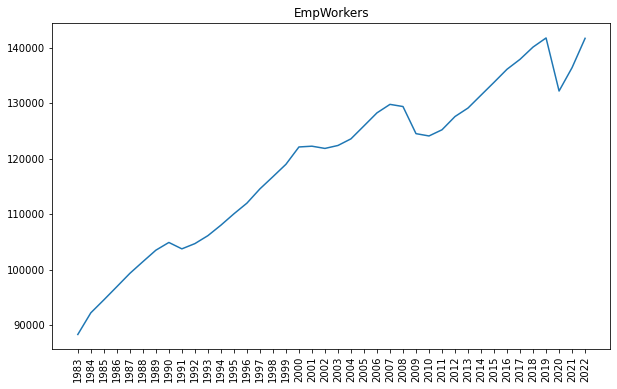

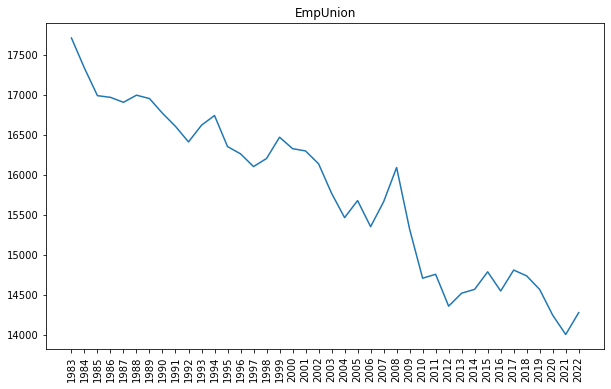

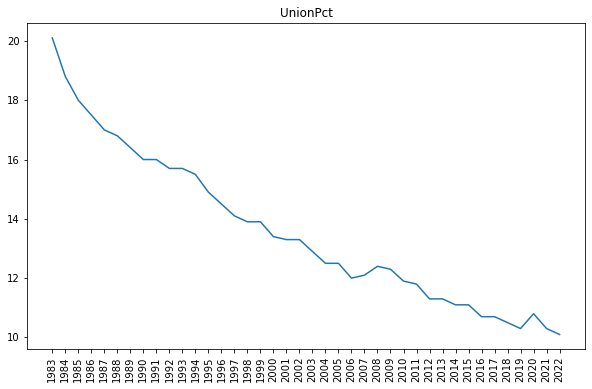

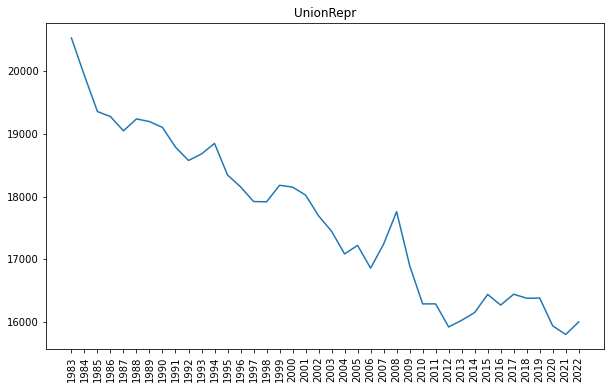

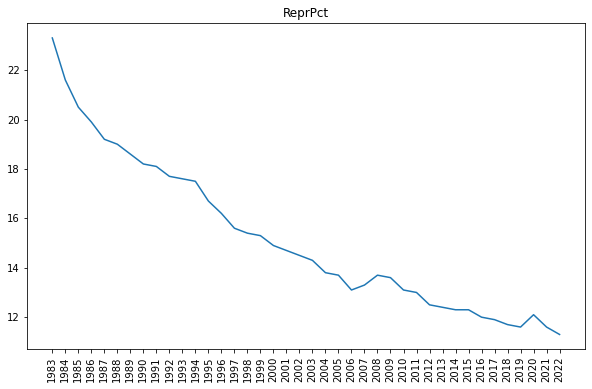

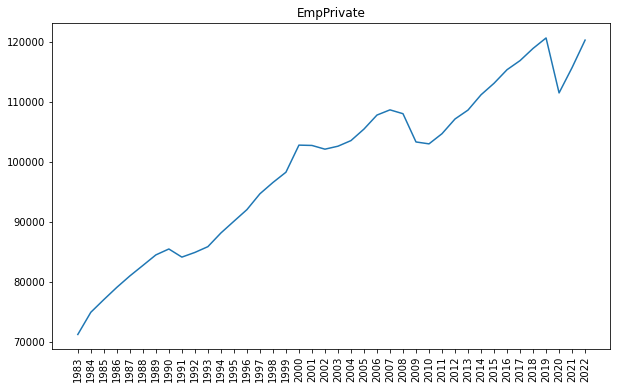

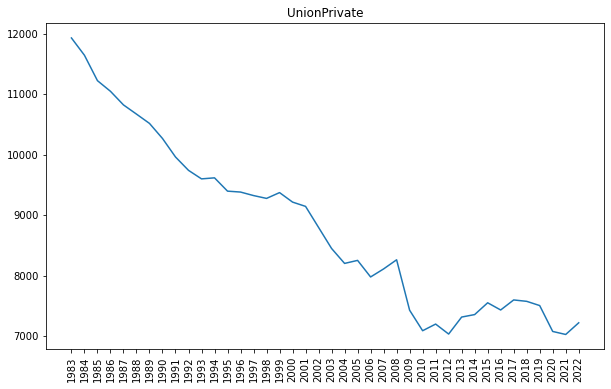

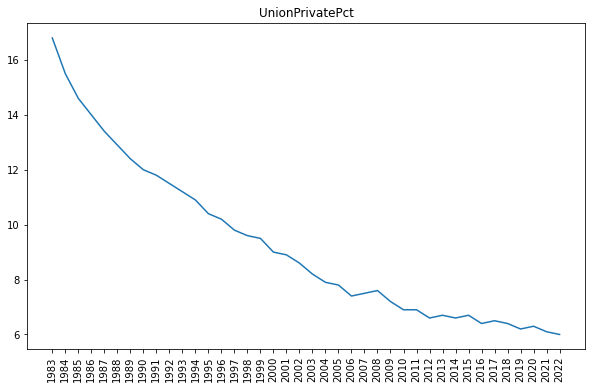

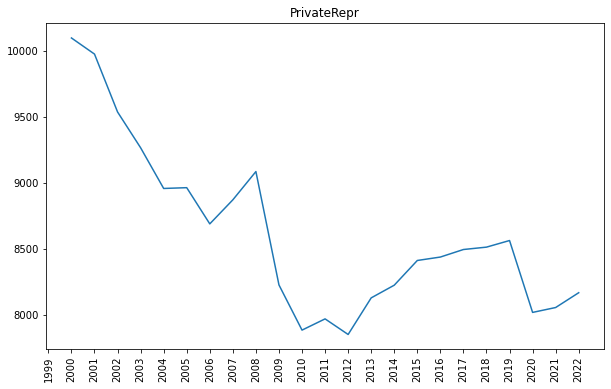

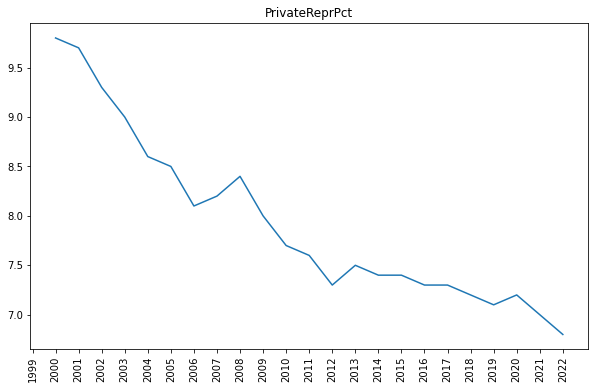

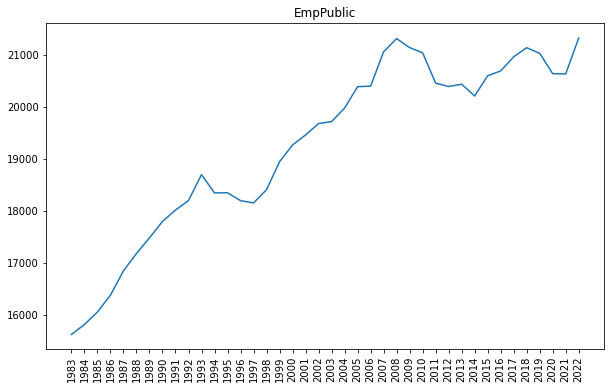

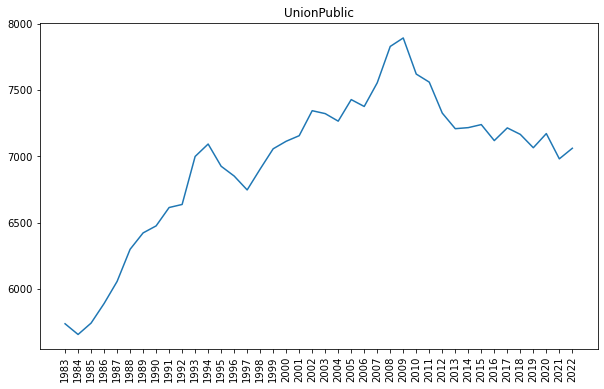

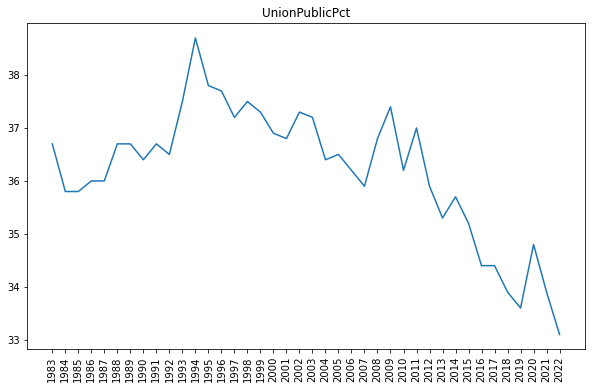

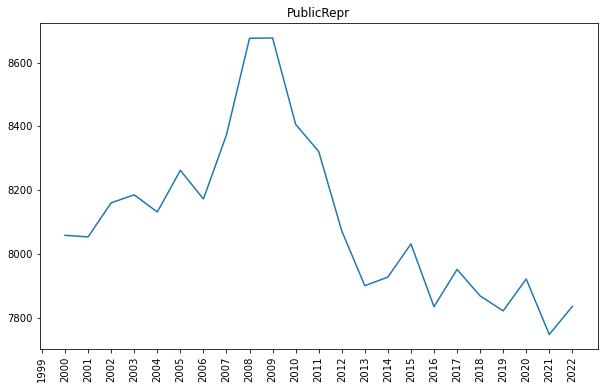

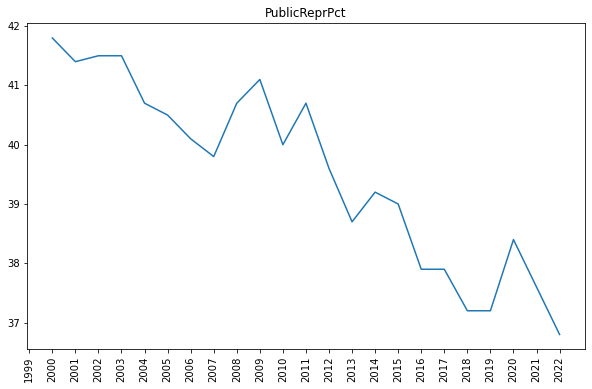

In [49]:
for col in union.columns:
    
    plt.figure(figsize=(10,6))
    plt.plot(union[col])
    plt.xticks(rotation=90)
    plt.title(col)
    plt.show()

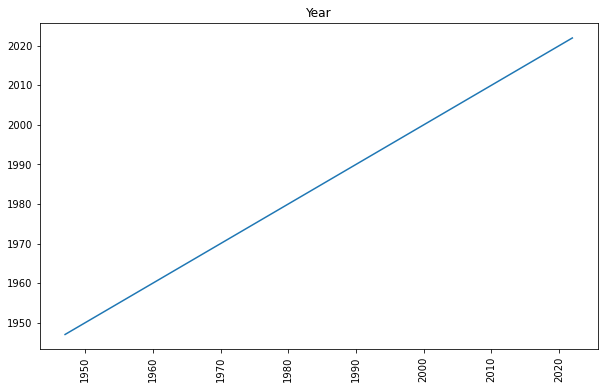

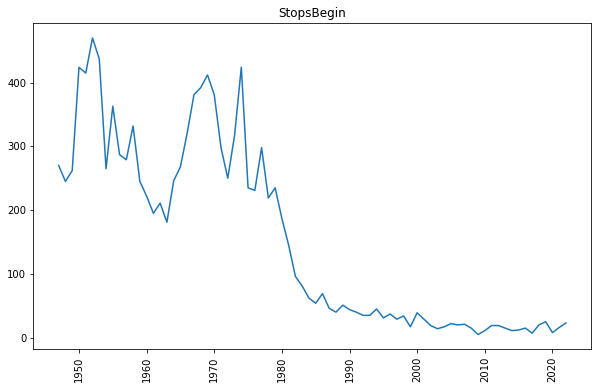

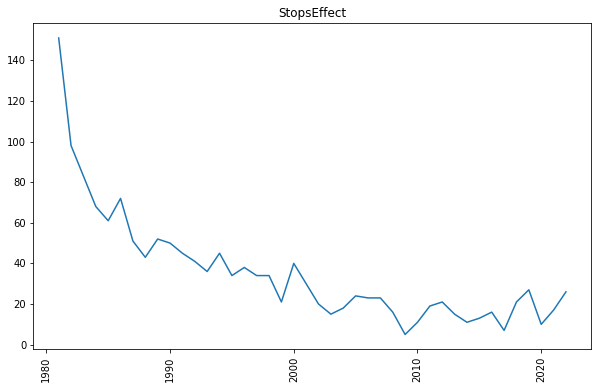

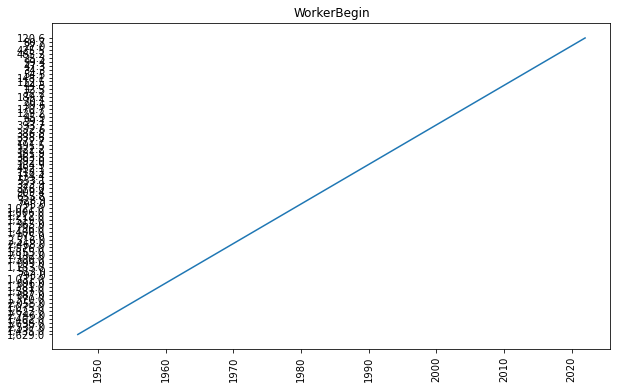

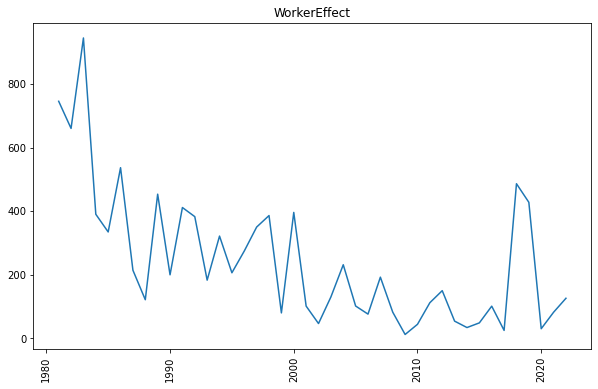

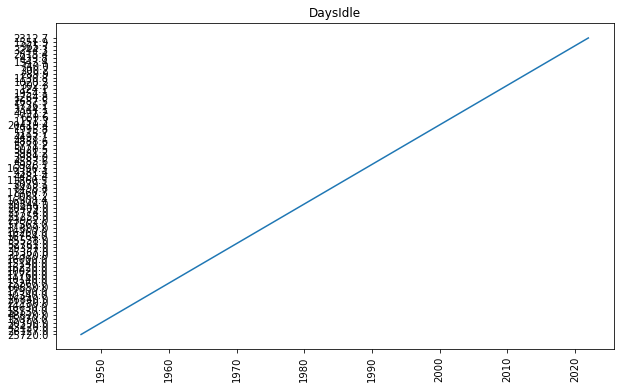

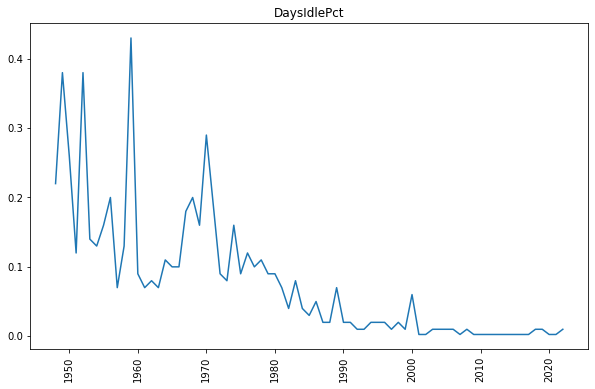

In [52]:
# to have them all in the same place, I'm going to do the same thing for the 'stoppages' dataframe

for col in stoppages.columns:
    
    plt.figure(figsize=(10,6))
    plt.plot(stoppages["Year"], stoppages[col])
    plt.xticks(rotation=90)
    plt.title(col)
    plt.show()

In [ ]:
# you know, I'd like to compare private vs public union representation
# side by side barcharts by year

for col in vc_list:
    vc = train_data.groupby(col)["Transported"].value_counts()
    X_axis = np.arange(len(vc.index)/2)
    X_axis_list = []
    for i in np.arange(len(vc.index)/2):
        X_axis_list.append(vc.iloc[::2].index[i][0])
    plt.bar(X_axis - 0.2, vc[vc.index.get_level_values('Transported') == False], 0.4, label="Not Transported")
    plt.bar(X_axis + 0.2, vc[vc.index.get_level_values('Transported') == True], 0.4, label="Transported")
    plt.xticks(X_axis, X_axis_list)
    plt.xlabel(col)
    plt.legend()
    plt.show()

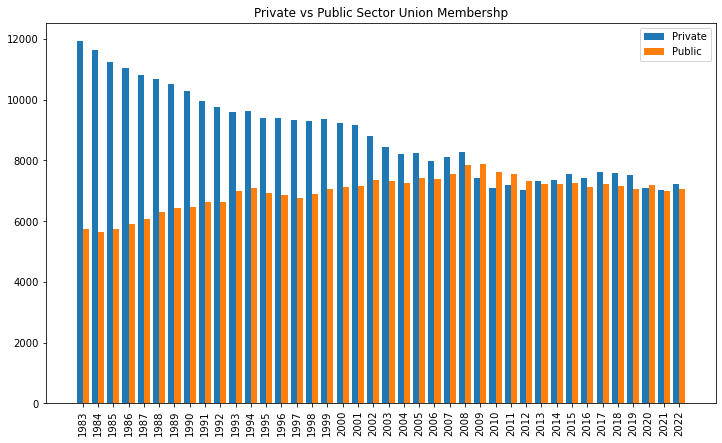

In [60]:

X_axis = np.arange(len(union.index))
plt.figure(figsize=(12,7))
plt.title("Private vs Public Sector Union Membershp")
plt.bar(X_axis - 0.2, union["UnionPrivate"], 0.4, label="Private")
plt.bar(X_axis + 0.2, union["UnionPublic"], 0.4, label="Public")
plt.xticks(X_axis, union.index, rotation=90)
plt.legend()
plt.show()

Ok, I like this:  it makes sense for the absolute numbers.  Indeed, while a line graph might be more appropriate for the percentages, I might stick with this.  I like the look.

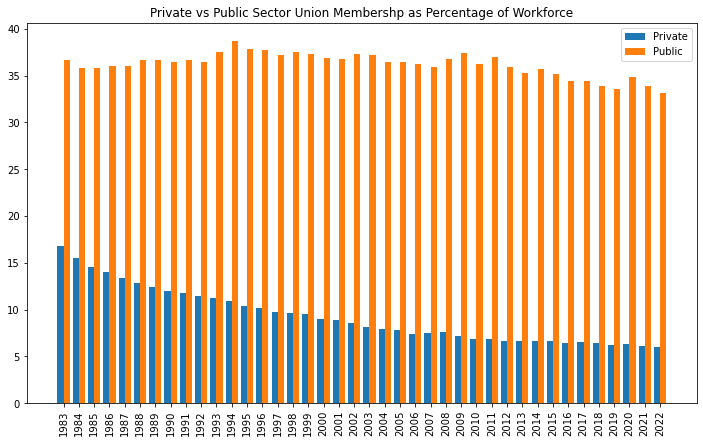

In [61]:
X_axis = np.arange(len(union.index))
plt.figure(figsize=(12,7))
plt.title("Private vs Public Sector Union Membershp as Percentage of Workforce")
plt.bar(X_axis - 0.2, union["UnionPrivatePct"], 0.4, label="Private")
plt.bar(X_axis + 0.2, union["UnionPublicPct"], 0.4, label="Public")
plt.xticks(X_axis, union.index, rotation=90)
plt.legend()
plt.show()

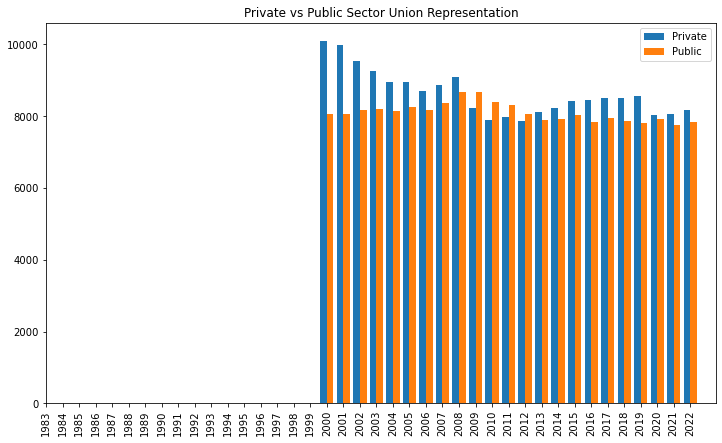

In [62]:
X_axis = np.arange(len(union.index))
plt.figure(figsize=(12,7))
plt.title("Private vs Public Sector Union Representation")
plt.bar(X_axis - 0.2, union["PrivateRepr"], 0.4, label="Private")
plt.bar(X_axis + 0.2, union["PublicRepr"], 0.4, label="Public")
plt.xticks(X_axis, union.index, rotation=90)
plt.legend()
plt.show()

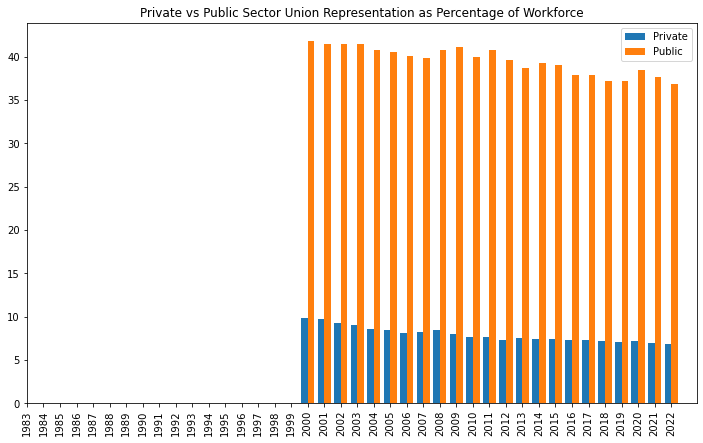

In [63]:
X_axis = np.arange(len(union.index))
plt.figure(figsize=(12,7))
plt.title("Private vs Public Sector Union Representation as Percentage of Workforce")
plt.bar(X_axis - 0.2, union["PrivateReprPct"], 0.4, label="Private")
plt.bar(X_axis + 0.2, union["PublicReprPct"], 0.4, label="Public")
plt.xticks(X_axis, union.index, rotation=90)
plt.legend()
plt.show()

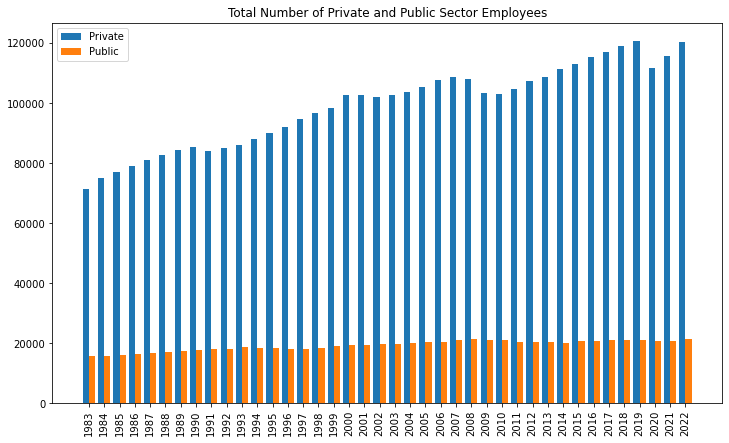

In [65]:
X_axis = np.arange(len(union.index))
plt.figure(figsize=(12,7))
plt.title("Total Number of Private and Public Sector Employees")
plt.bar(X_axis - 0.2, union["EmpPrivate"], 0.4, label="Private")
plt.bar(X_axis + 0.2, union["EmpPublic"], 0.4, label="Public")
plt.xticks(X_axis, union.index, rotation=90)
plt.legend()
plt.show()

In [66]:
# maybe it would be interesting to plot some ratios

union.columns

Index(['EmpWorkers', 'EmpUnion', 'UnionPct', 'UnionRepr', 'ReprPct',
       'EmpPrivate', 'UnionPrivate', 'UnionPrivatePct', 'PrivateRepr',
       'PrivateReprPct', 'EmpPublic', 'UnionPublic', 'UnionPublicPct',
       'PublicRepr', 'PublicReprPct'],
      dtype='object')

In [68]:
union["EmpPrivatePublicRatio"] = union["EmpPrivate"]/union["EmpPublic"]

In [70]:
union


,EmpWorkers,EmpUnion,UnionPct,UnionRepr,ReprPct,EmpPrivate,UnionPrivate,UnionPrivatePct,PrivateRepr,PrivateReprPct,EmpPublic,UnionPublic,UnionPublicPct,PublicRepr,PublicReprPct,EmpPrivatePublicRatio
1983,88290.0,17717.0,20.1,20532.0,23.3,71225.0,11933.0,16.8,NaN,NaN,15618.0,5735.0,36.7,NaN,NaN,4.560443
1984,92194.0,17340.0,18.8,19932.0,21.6,74931.0,11647.0,15.5,NaN,NaN,15809.0,5654.0,35.8,NaN,NaN,4.739768
1985,94521.0,16996.0,18.0,19358.0,20.5,77044.0,11227.0,14.6,NaN,NaN,16050.0,5740.0,35.8,NaN,NaN,4.800249
1986,96903.0,16975.0,17.5,19278.0,19.9,79091.0,11051.0,14.0,NaN,NaN,16374.0,5888.0,36.0,NaN,NaN,4.830280
1987,99303.0,16913.0,17.0,19051.0,19.2,80993.0,10826.0,13.4,NaN,NaN,16841.0,6055.0,36.0,NaN,NaN,4.809275
1988,101407.0,17002.0,16.8,19241.0,19.0,82741.0,10674.0,12.9,NaN,NaN,17175.0,6298.0,36.7,NaN,NaN,4.817525
1989,103480.0,16960.0,16.4,19198.0,18.6,84504.0,10520.0,12.4,NaN,NaN,17476.0,6422.0,36.7,NaN,NaN,4.835431
1990,104876.0,16776.0,16.0,19105.0,18.2,85493.0,10271.0,12.0,NaN,NaN,17791.0,6475.0,36.4,NaN,NaN,4.805407
1991,103723.0,16612.0,16.0,18790.0,18.1,84138.0,9965.0,11.8,NaN,NaN,18010.0,6614.0,36.7,NaN,NaN,4.671738
1992,104668.0,16418.0,15.7,18578.0,17.7,84917.0,9744.0,11.5,NaN,NaN,18193.0,6637.0,36.5,NaN,NaN,4.667564


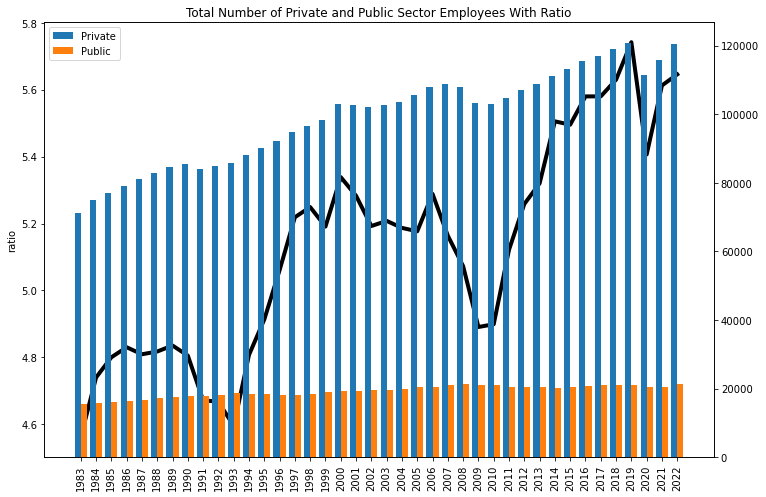

In [90]:
X_axis = np.arange(len(union.index))
#plt.figure(figsize=(12,7))
fig, ax1 = plt.subplots()
plt.xticks(X_axis, union.index, rotation=90)
ax1.plot(X_axis, union["EmpPrivatePublicRatio"], label="Ratio", linewidth=4, color="#000000")
ax1.set_ylabel("ratio")

ax2 = ax1.twinx()


ax2.bar(X_axis - 0.2, union["EmpPrivate"], 0.4, label="Private")
ax2.bar(X_axis + 0.2, union["EmpPublic"], 0.4, label="Public")

plt.title("Total Number of Private and Public Sector Employees With Ratio")


plt.legend()
fig.set_size_inches(12,8)
plt.show()

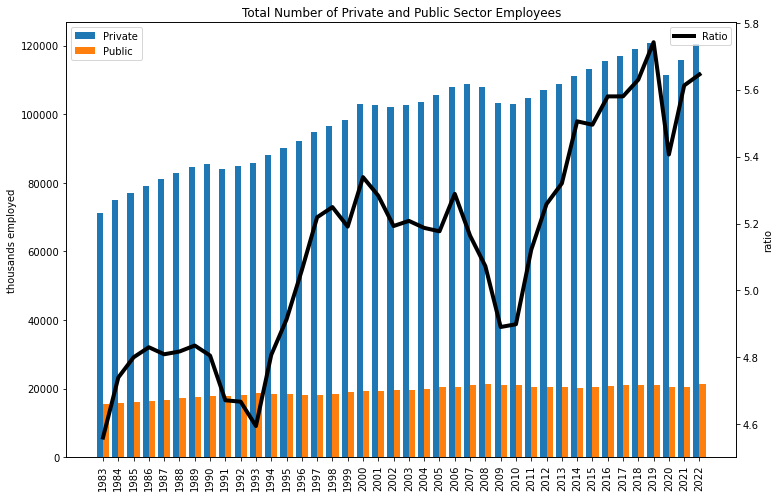

In [96]:
X_axis = np.arange(len(union.index))
#plt.figure(figsize=(12,7))
fig, ax1 = plt.subplots()
plt.xticks(X_axis, union.index, rotation=90)



ax1.bar(X_axis - 0.2, union["EmpPrivate"], 0.4, label="Private")
ax1.bar(X_axis + 0.2, union["EmpPublic"], 0.4, label="Public")
ax1.set_ylabel("thousands employed")
plt.legend()

ax2 = ax1.twinx()

ax2.plot(X_axis, union["EmpPrivatePublicRatio"], label="Ratio", linewidth=4, color="#000000")
ax2.set_ylabel("ratio")


plt.title("Total Number of Private and Public Sector Employees")


plt.legend()

fig.set_size_inches(12,8)
plt.show()

At last, this looks pretty good - I'd like to produce similar graphs for union membership and representation...


In [99]:
union["CheckPct"] = (union["EmpUnion"]/union["EmpWorkers"]) - union["UnionPct"]/100

In [101]:
union.drop("CheckPct", axis=1, inplace=True)

In [104]:
union["UnionPrivatePublicRatio"] = union["UnionPrivate"]/union["UnionPublic"]

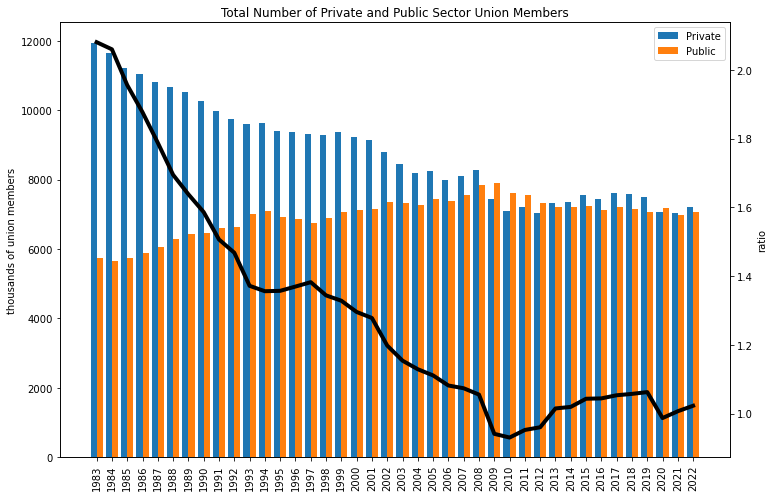

In [107]:
X_axis = np.arange(len(union.index))
#plt.figure(figsize=(12,7))
fig, ax1 = plt.subplots()
plt.xticks(X_axis, union.index, rotation=90)



ax1.bar(X_axis - 0.2, union["UnionPrivate"], 0.4, label="Private")
ax1.bar(X_axis + 0.2, union["UnionPublic"], 0.4, label="Public")
ax1.set_ylabel("thousands of union members")
plt.legend()

ax2 = ax1.twinx()

ax2.plot(X_axis, union["UnionPrivatePublicRatio"], label="Ratio", linewidth=4, color="#000000")
ax2.set_ylabel("ratio")


plt.title("Total Number of Private and Public Sector Union Members")



fig.set_size_inches(12,8)
plt.show()

In [108]:
union["UnionPctPrivatePublicRatio"] = union["UnionPrivatePct"]/union["UnionPublicPct"]

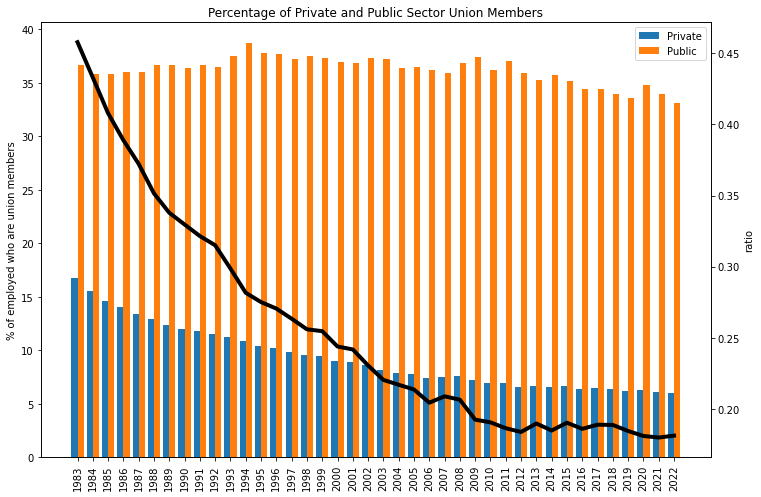

In [110]:
X_axis = np.arange(len(union.index))

fig, ax1 = plt.subplots()
plt.xticks(X_axis, union.index, rotation=90)



ax1.bar(X_axis - 0.2, union["UnionPrivatePct"], 0.4, label="Private")
ax1.bar(X_axis + 0.2, union["UnionPublicPct"], 0.4, label="Public")
ax1.set_ylabel("% of employed who are union members")
plt.legend()

ax2 = ax1.twinx()

ax2.plot(X_axis, union["UnionPctPrivatePublicRatio"], label="Ratio", linewidth=4, color="#000000")
ax2.set_ylabel("ratio")


plt.title("Percentage of Private and Public Sector Union Members")



fig.set_size_inches(12,8)
plt.show()

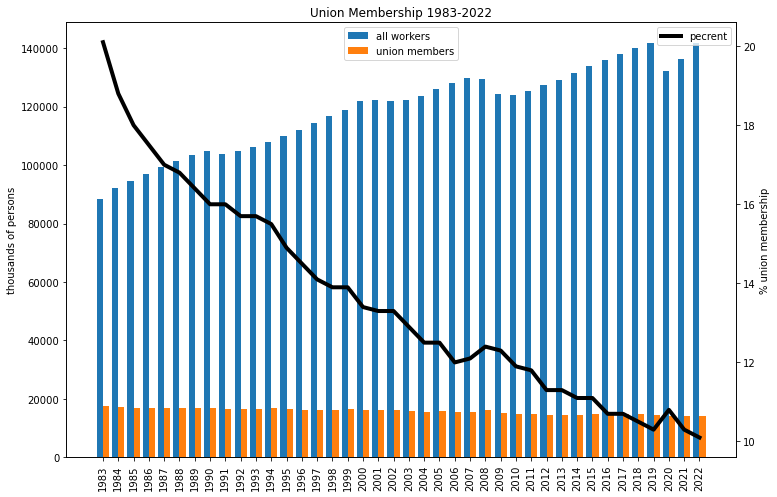

In [114]:
# EmpWorkers  /  EmpUnion, UnionPct

X_axis = np.arange(len(union.index))

fig, ax1 = plt.subplots()
plt.xticks(X_axis, union.index, rotation=90)



ax1.bar(X_axis - 0.2, union["EmpWorkers"], 0.4, label="all workers")
ax1.bar(X_axis + 0.2, union["EmpUnion"], 0.4, label="union members")
ax1.set_ylabel("thousands of persons")
plt.legend(loc="upper center")

ax2 = ax1.twinx()

ax2.plot(X_axis, union["UnionPct"], label="pecrent", linewidth=4, color="#000000")
ax2.set_ylabel("% union membership")
plt.legend()

plt.title("Union Membership 1983-2022")



fig.set_size_inches(12,8)
plt.show()


In [121]:
# need one presentable graph from "stoppages" - otherwise why did I even bother with it?
stoppages.set_index(stoppages["Year"], inplace=True, drop=True)

In [122]:
stoppages

,Year,StopsBegin,StopsEffect,WorkerBegin,WorkerEffect,DaysIdle,DaysIdlePct
Year,,,,,,,
1947,1947,270,NaN,"1,629.0",NaN,25720.0,NaN
1948,1948,245,NaN,"1,435.0",NaN,26127.0,0.22
1949,1949,262,NaN,"2,537.0",NaN,43420.0,0.38
1950,1950,424,NaN,"1,698.0",NaN,30390.0,0.26
1951,1951,415,NaN,"1,462.0",NaN,15070.0,0.12
...,...,...,...,...,...,...,...
2018,2018,20,21,485.2,487.0,2815.4,0.01
2019,2019,25,27,425.5,428.5,3244.3,0.01
2020,2020,8,10,27.0,30.6,965.7,0.0025


In [123]:
# I had expected the 'drop=True' param to drop the 'Year' column, but I guess not
stoppages.drop("Year", axis=1, inplace=True)

In [124]:
stoppages

,StopsBegin,StopsEffect,WorkerBegin,WorkerEffect,DaysIdle,DaysIdlePct
Year,,,,,,
1947,270,NaN,"1,629.0",NaN,25720.0,NaN
1948,245,NaN,"1,435.0",NaN,26127.0,0.22
1949,262,NaN,"2,537.0",NaN,43420.0,0.38
1950,424,NaN,"1,698.0",NaN,30390.0,0.26
1951,415,NaN,"1,462.0",NaN,15070.0,0.12
...,...,...,...,...,...,...
2018,20,21,485.2,487.0,2815.4,0.01
2019,25,27,425.5,428.5,3244.3,0.01
2020,8,10,27.0,30.6,965.7,0.0025


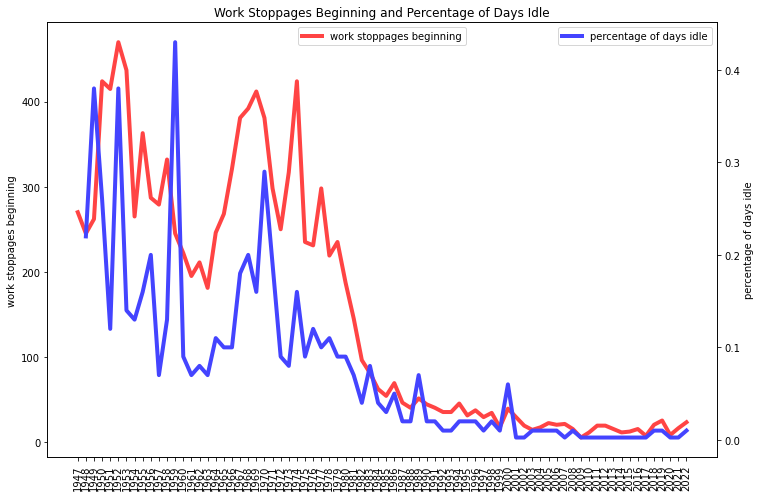

In [127]:

# DaysIdlePct and StopsBegin

X_axis = np.arange(len(stoppages.index))

fig, ax1 = plt.subplots()
plt.xticks(X_axis, stoppages.index, rotation=90)



ax1.plot(X_axis, stoppages["StopsBegin"], linewidth=4, label="work stoppages beginning", color="#FF4444")
ax1.set_ylabel("work stoppages beginning")
plt.legend(loc='upper center')

ax2 = ax1.twinx()

ax2.plot(X_axis, stoppages["DaysIdlePct"], label="percentage of days idle", linewidth=4, color="#4444FF")
ax2.set_ylabel("percentage of days idle")
plt.legend()

plt.title("Work Stoppages Beginning and Percentage of Days Idle")



fig.set_size_inches(12,8)
plt.show()